# Portfolioprojekt: MovieLens Movie Recommendation System (Data Preprocessing)

The project utilizes the MovieLens dataset, provided by GroupLens:

[https://grouplens.org/datasets/movielens/latest/](https://grouplens.org/datasets/movielens/latest/)

We aim to develop a robust movie recommendation system by completing the following tasks:

- **Data reading and cleaning:** Load the MovieLens dataset, identify and handle any missing values, and ensure data consistency.
- **Exploratory Data Analysis (EDA):** Conduct an initial exploration of the data to understand key patterns, distributions, and relationships.
- **Data preparation for model training:** Prepare and structure the data in a way that is optimal for training machine learning models.

This notebook focuses on the initial data exploration and preprocessing steps, setting the foundation for building an accurate and effective movie recommendation system.


Movies Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None

Ratings Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB
None

Tags Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328315 entries, 0 to 2328314
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory

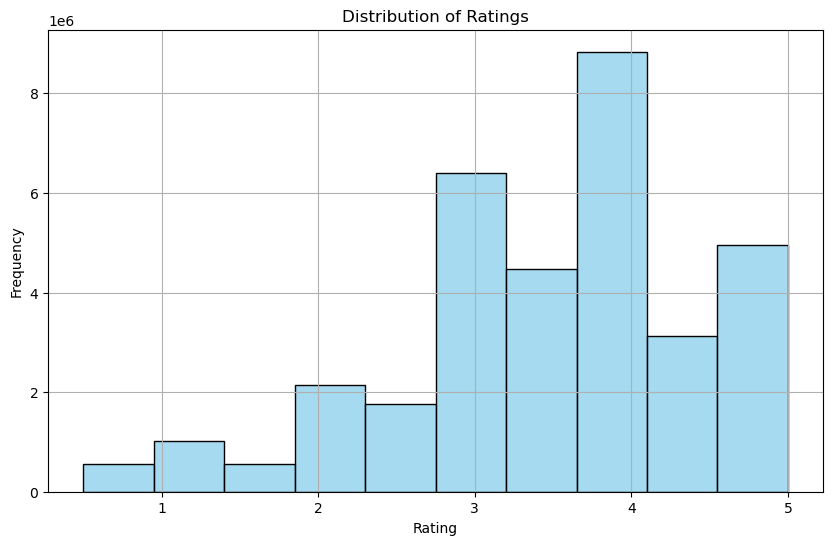

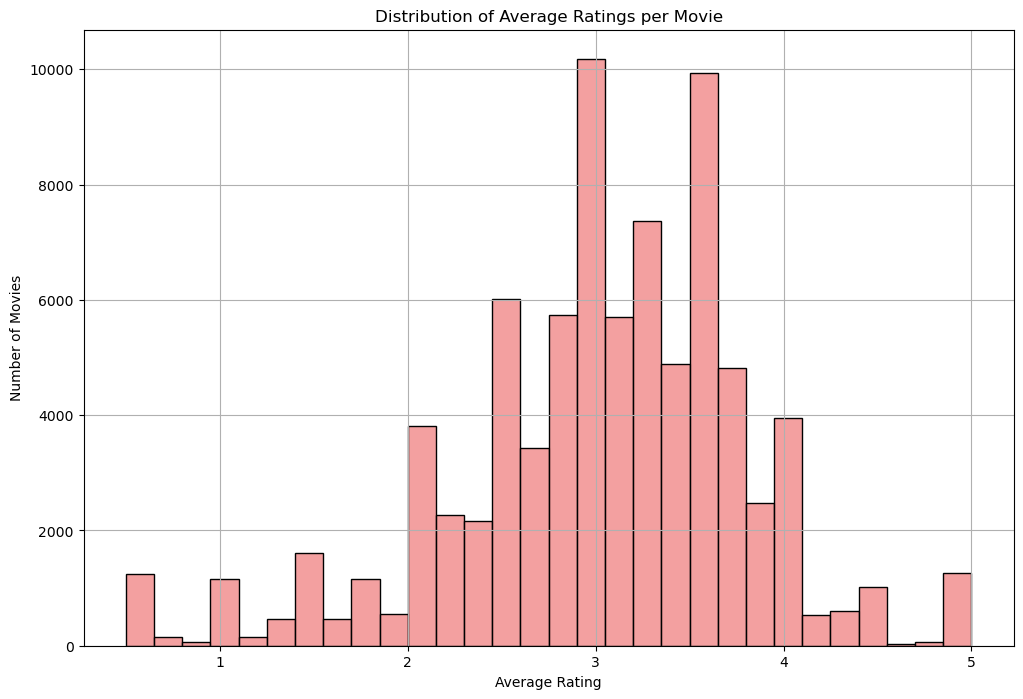

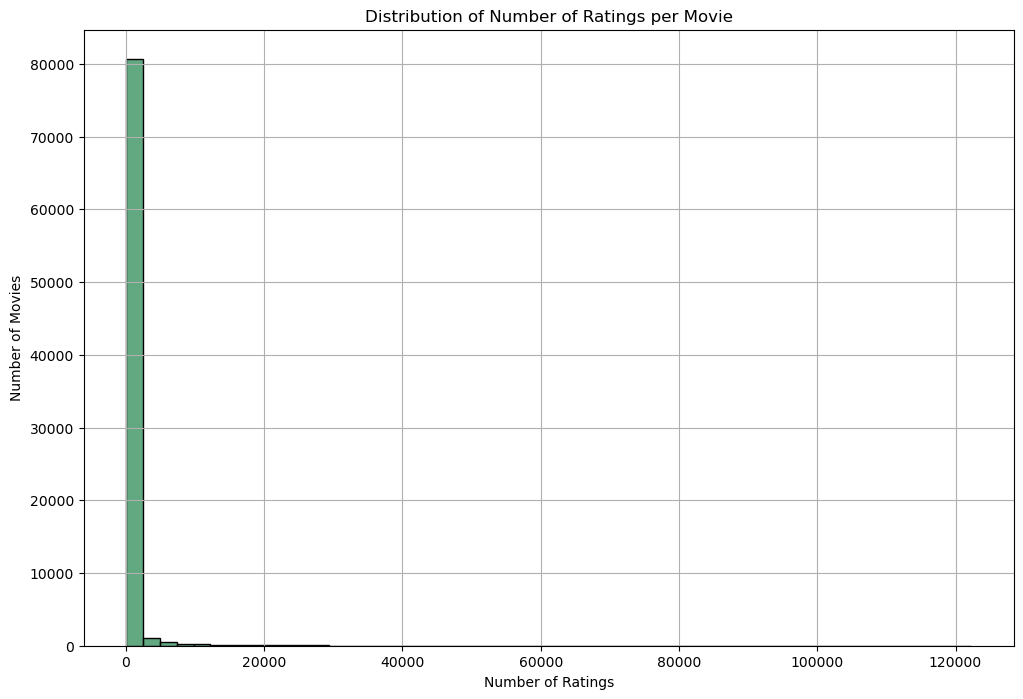

C:\Users\levyn\AppData\Local\Temp\ipykernel_10120\1688257790.py:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




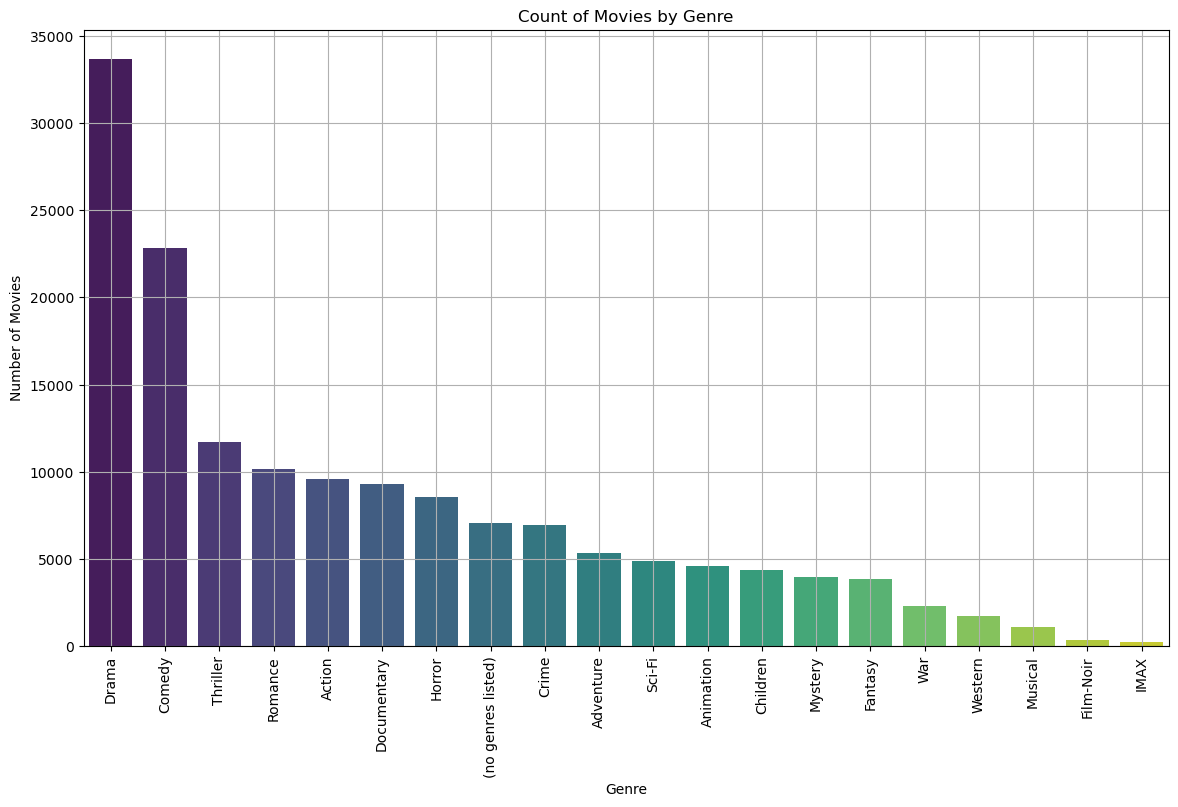

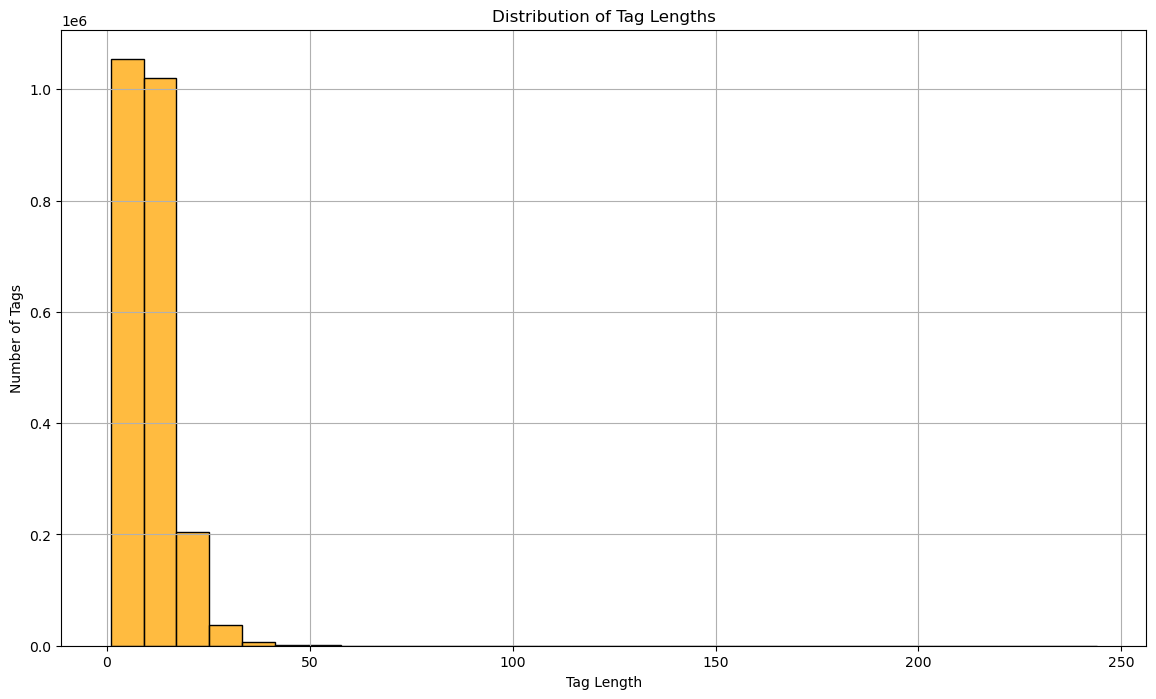

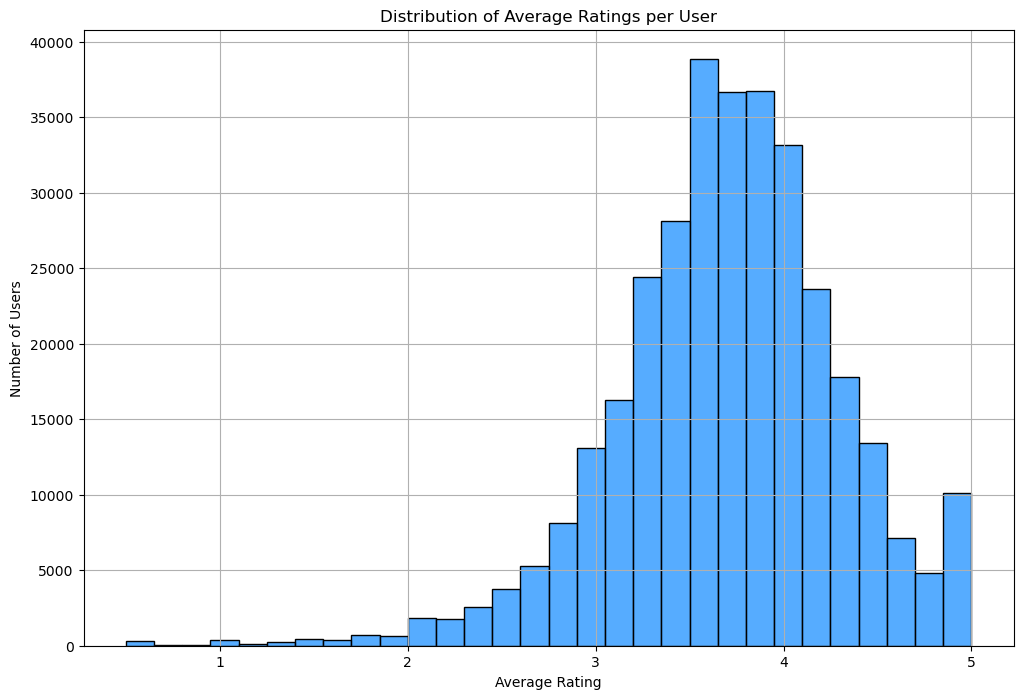

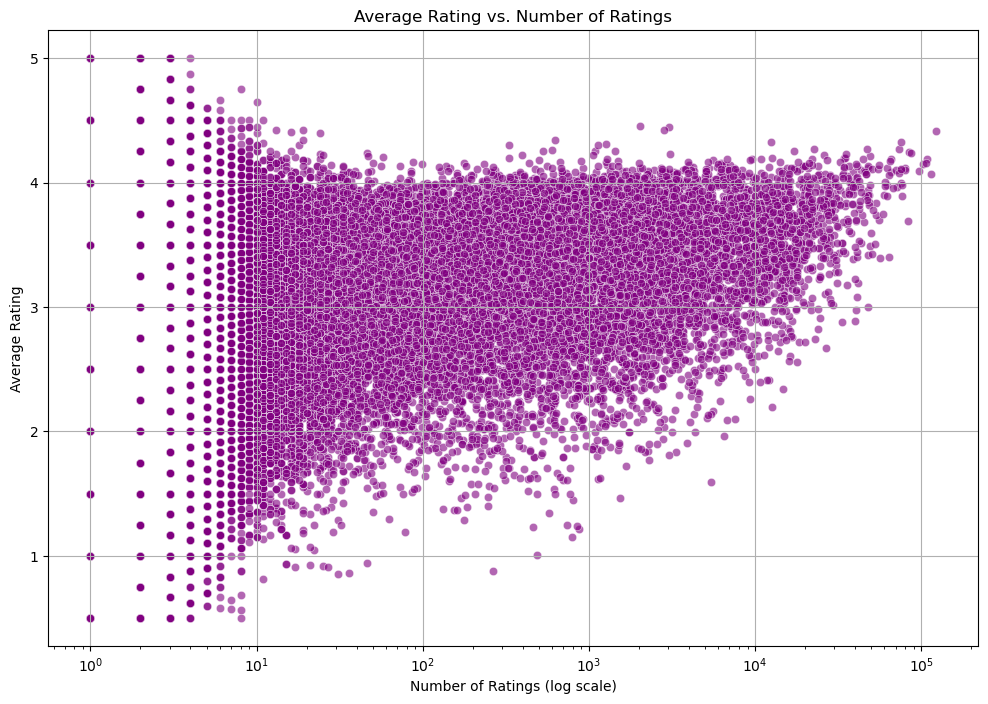

C:\Users\levyn\AppData\Local\Temp\ipykernel_10120\1688257790.py:143: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




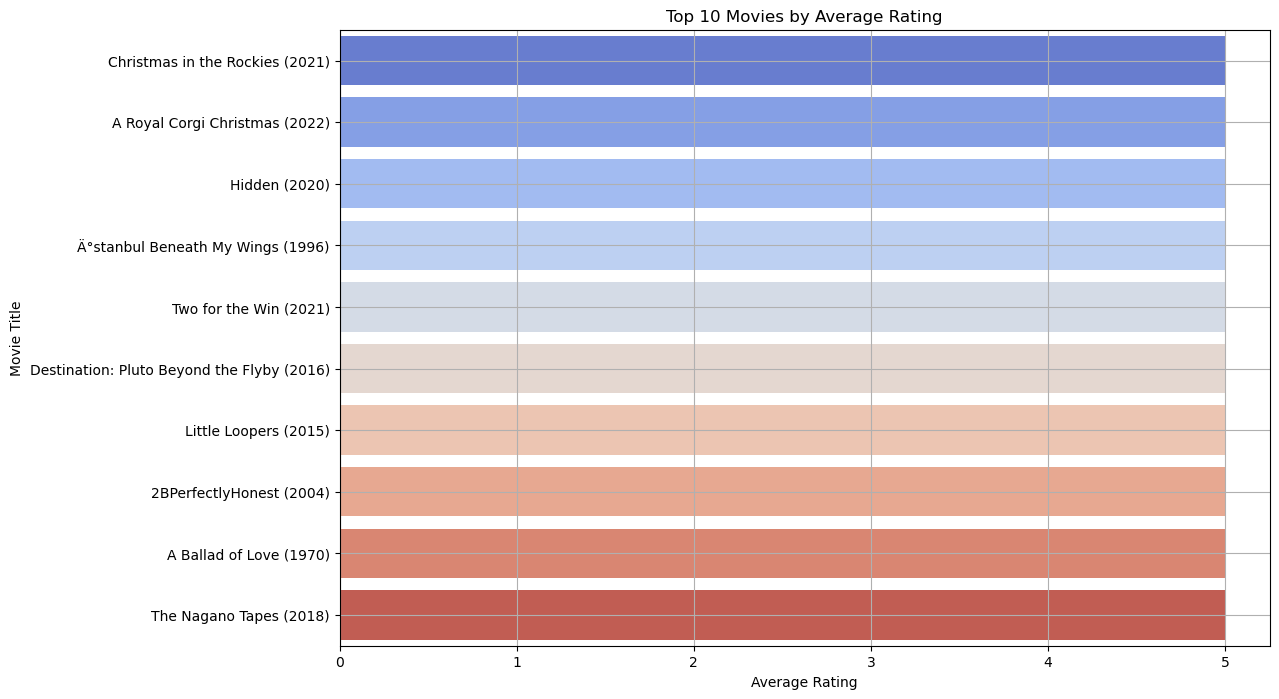

C:\Users\levyn\AppData\Local\Temp\ipykernel_10120\1688257790.py:154: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




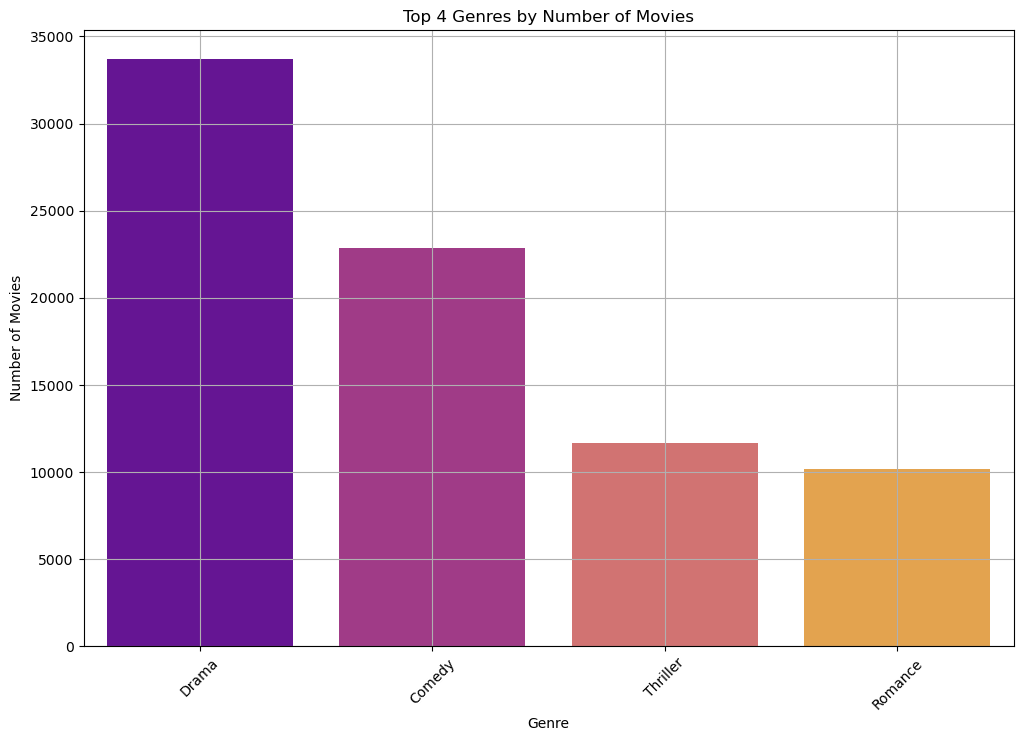

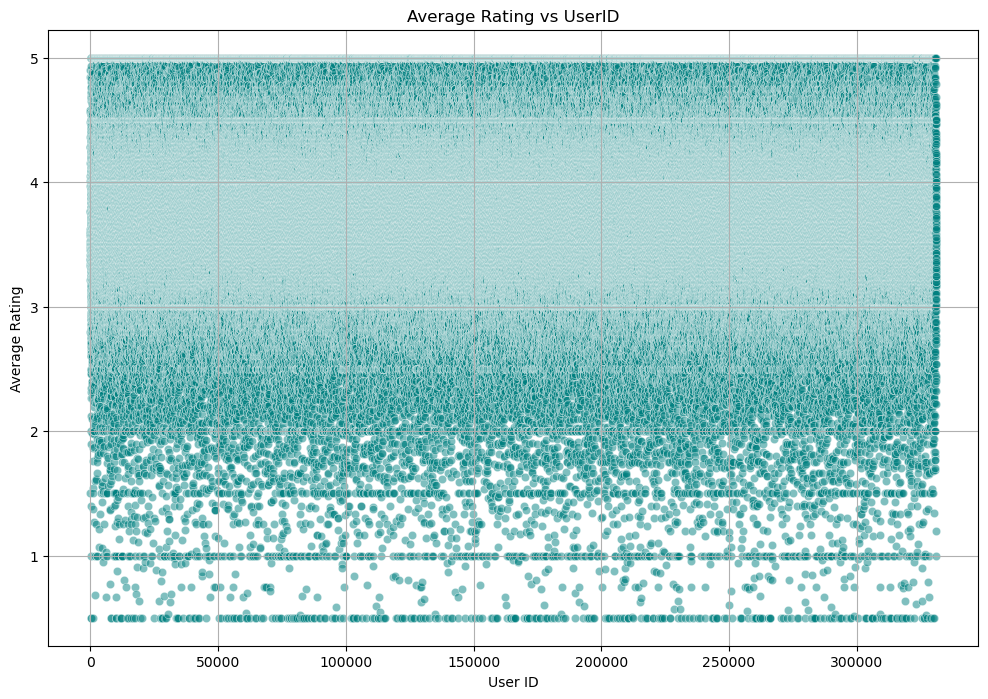


First 5 rows of movies_df:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  year  num_of_ratings  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995           76813  
1                     [Adventure, Children, Fantasy]  1995           30209  
2                                  [Comedy, Romance]  1995           15820  
3                           [Comedy, Drama, Romance]  1995            3028  
4                                           [Comedy]  1995           15801  

First 5 rows of ratings_df:
   userId  movieId  rating           timestamp  num_of_ratings
0       1        1     4.0 2008-11-03 17:52:19           76813
1       1      110     4.0 2008-11-05 06:04:46        

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from tqdm import tqdm

# Initialize progress bar functionality
tqdm.pandas()

# Load the datasets
ratings_df = pd.read_csv('../data/ratings.csv', encoding='latin-1')
tags_df = pd.read_csv('../data/tags.csv', encoding='latin-1')
movies_df = pd.read_csv('../data/movies.csv', encoding='latin-1')
links_df = pd.read_csv('../data/links.csv', encoding='latin-1')

# Display basic information about the datasets
print("Movies Data Info:")
print(movies_df.info())
print("\nRatings Data Info:")
print(ratings_df.info())
print("\nTags Data Info:")
print(tags_df.info())
print("\nLinks Data Info:")
print(links_df.info())

# Check for missing values
print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())
print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())
print("\nMissing values in tags_df:")
print(tags_df.isnull().sum())
print("\nMissing values in links_df:")
print(links_df.isnull().sum())

# Convert the timestamp to date format
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Extract the year from the title of the film
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)

# Verify the extraction
print("\nExtracted Years from Movie Titles:")
print(movies_df[['title', 'year']].head(10))

# Preliminary analysis of the datasets
print(f"\nMovies Data: {movies_df.shape[0]} movies")
print(f"Ratings Data: {ratings_df.shape[0]} ratings")
print(f"Tags Data: {tags_df.shape[0]} tags")

num_users = ratings_df['userId'].nunique()
print(f"Number of unique users: {num_users}")

# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Distribution of Average Ratings per Movie
avg_rating_per_movie = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avg_rating_per_movie = avg_rating_per_movie.sort_values('rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.histplot(avg_rating_per_movie['rating'], bins=30, kde=False, color='lightcoral')
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 3. Distribution of Number of Ratings per Movie
ratings_per_movie = ratings_df.groupby('movieId')['rating'].count().reset_index()
ratings_per_movie = ratings_per_movie.sort_values('rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.histplot(ratings_per_movie['rating'], bins=50, kde=False, color='seagreen')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 4. Distribution of Genres
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))
genres_exploded = movies_df.explode('genres')

plt.figure(figsize=(14, 8))
sns.countplot(data=genres_exploded, x='genres', order=genres_exploded['genres'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 5. Distribution of Tag Lengths
plt.figure(figsize=(14, 8))
sns.histplot(tags_df['tag'].str.len(), bins=30, kde=False, color='orange')
plt.title('Distribution of Tag Lengths')
plt.xlabel('Tag Length')
plt.ylabel('Number of Tags')
plt.grid(True)
plt.show()

# 6. Distribution of Average Ratings per User
avg_rating_per_user = ratings_df.groupby('userId')['rating'].mean().reset_index()
avg_rating_per_user = avg_rating_per_user.sort_values('rating')

plt.figure(figsize=(12, 8))
sns.histplot(avg_rating_per_user['rating'], bins=30, kde=False, color='dodgerblue')
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# 7. Scatter Plot: Average Rating vs. Number of Ratings
movie_stats = ratings_df.groupby('movieId').agg({'rating': ['mean', 'count']}).reset_index()
movie_stats.columns = ['movieId', 'avg_rating', 'num_ratings']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=movie_stats, x='num_ratings', y='avg_rating', color='purple', alpha=0.6)
plt.xscale('log')  # Log scale for better visualization
plt.yscale('linear')
plt.title('Average Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings (log scale)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# 8. Top 10 Movies by Average Rating
top_10_movies = ratings_df.groupby('movieId').agg({'rating': 'mean'}).reset_index()
top_10_movies = top_10_movies.sort_values(by='rating', ascending=False).head(10)
top_10_movies = top_10_movies.merge(movies_df[['movieId', 'title']], on='movieId')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_movies, x='rating', y='title', palette='coolwarm')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.grid(True)
plt.show()

# 9. Top 4 Genres by Number of Movies
top_genres = genres_exploded['genres'].value_counts().head(4)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='plasma')
plt.title('Top 4 Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 10. Scatter Plot: Average Rating vs. UserID
user_rating_stats = ratings_df.groupby('userId').agg({'rating': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=user_rating_stats, x='userId', y='rating', color='teal', alpha=0.5)
plt.title('Average Rating vs UserID')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# 11. Histogram: Number of Movies by Year
movie_count_by_year = px.histogram(movies_df.dropna(subset=['year']), x='year', height=400, title='Movie Count by Year')
movie_count_by_year.update_xaxes(categoryorder="total descending")
movie_count_by_year.show()

# 12. Top 10 Movies by Number of Ratings
ratings_df['num_of_ratings'] = ratings_df.groupby('movieId')['rating'].transform('count')
movies_df = movies_df.merge(ratings_df.groupby('movieId')['num_of_ratings'].first().reset_index(), on='movieId')

top_10_movies_by_ratings = movies_df.sort_values('num_of_ratings', ascending=False).head(10)
top_10_ratings_plot = px.bar(top_10_movies_by_ratings, x='title', y='num_of_ratings', height=600, title='Top 10 Movies by Number of Ratings')
top_10_ratings_plot.update_xaxes(tickangle=45)
top_10_ratings_plot.show()

# Display the first few rows of each dataset
print("\nFirst 5 rows of movies_df:")
print(movies_df.head())

print("\nFirst 5 rows of ratings_df:")
print(ratings_df.head())

print("\nFirst 5 rows of tags_df:")
print(tags_df.head())

print("\nFirst 5 rows of links_df:")
print(links_df.head())
